# EDA on taxi_trip_pricing

In [36]:
import pandas as pd
from taxipred.utils.constants import TAXI_CSV_RAW

df = pd.read_csv(TAXI_CSV_RAW)
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [37]:
df["Trip_Distance_km"].sort_values(ascending=False).head(20)

64     146.067047
302    145.747060
532    139.476515
268    139.062230
616    138.763887
27     138.098328
225    130.809001
835    126.547628
588    122.820191
338    116.667681
267    116.196064
108    112.830958
141    109.616082
797    108.146994
481    107.786832
22     105.943550
410    104.371791
110    102.747556
747    101.039704
287    100.380420
Name: Trip_Distance_km, dtype: float64

In [38]:
df["Trip_Price"].sort_values(ascending=False).head(20)

616    332.043689
287    329.913004
225    328.871769
141    327.217665
302    325.098950
481    322.725996
64     320.958664
532    296.088697
747    283.645201
27     280.877302
268    276.840597
110    274.535087
338    248.295209
588    247.598318
797    239.171407
108    233.008285
835    224.914663
267    206.699570
410    206.508652
22     201.869509
Name: Trip_Price, dtype: float64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [40]:
df.shape

(1000, 11)

In [41]:
df_notna = pd.read_csv(TAXI_CSV_RAW).dropna()
df_notna.shape

(562, 11)

In [42]:
df.isna().mean().sort_values(ascending=False)

Trip_Distance_km         0.050
Time_of_Day              0.050
Day_of_Week              0.050
Passenger_Count          0.050
Traffic_Conditions       0.050
Weather                  0.050
Base_Fare                0.050
Per_Km_Rate              0.050
Per_Minute_Rate          0.050
Trip_Duration_Minutes    0.050
Trip_Price               0.049
dtype: float64

### Nearly 5% of every column is NaN
Since its evenly distributed, i consider just dropping them all.

In [43]:
df.head(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN
9,35.70,Afternoon,Weekday,2.0,Low,Rain,3.39,1.52,0.47,NaN,75.5657


In [44]:
numeric_df = df.select_dtypes(include="number")
corr = numeric_df.corr()

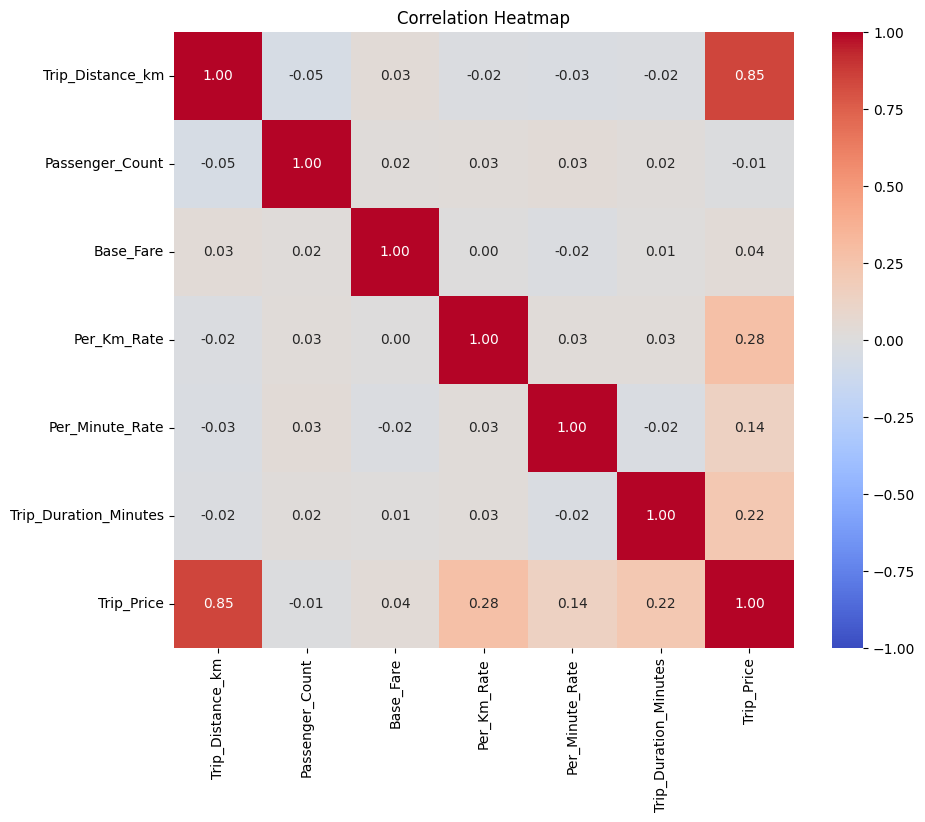

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title("Correlation Heatmap")
plt.show()

In [46]:
corr["Trip_Price"].sort_values(ascending=False)

Trip_Price               1.000000
Trip_Distance_km         0.849123
Per_Km_Rate              0.275135
Trip_Duration_Minutes    0.221211
Per_Minute_Rate          0.141226
Base_Fare                0.035533
Passenger_Count         -0.014223
Name: Trip_Price, dtype: float64

### From this, it's clear that distance is the dominant feature for predicting price.

Since the categorical df isn't suitable for heatmaps, I will use groupby to analyze their correlation with the price.

In [47]:
df.groupby("Traffic_Conditions")["Trip_Price"].mean().sort_values(ascending=False)

Traffic_Conditions
High      65.059510
Low       55.597238
Medium    54.547422
Name: Trip_Price, dtype: float64

In [48]:
df.groupby("Time_of_Day")["Trip_Price"].mean().sort_values(ascending=False)

Time_of_Day
Afternoon    57.958716
Evening      56.404504
Night        56.304401
Morning      55.949429
Name: Trip_Price, dtype: float64

In [49]:
df.groupby("Weather")["Trip_Price"].median().sort_values(ascending=False)

Weather
Rain     52.68775
Snow     50.07450
Clear    48.61490
Name: Trip_Price, dtype: float64

In [50]:
df.groupby("Day_of_Week")["Trip_Price"].mean().sort_values(ascending=False)

Day_of_Week
Weekday    58.012418
Weekend    55.001961
Name: Trip_Price, dtype: float64

<Axes: xlabel='Traffic_Conditions', ylabel='Trip_Price'>

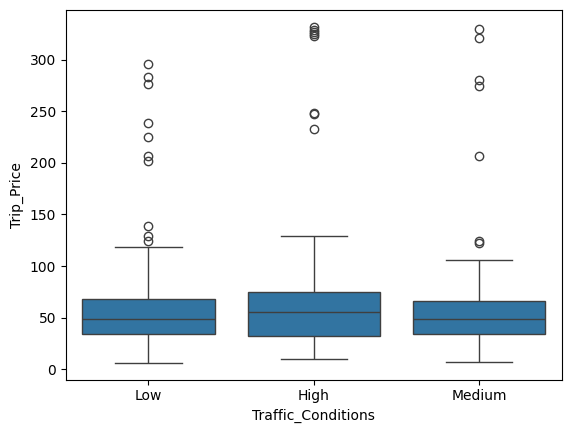

In [52]:
sns.boxplot(x="Traffic_Conditions", y="Trip_Price", data=df)

In [ ]:
df.describe(percentiles=[0.01, 0.05, 0.95, 0.99]).drop("count")

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
1%,1.674300,1.000000,2.050000,0.510000,0.100000,6.079600,10.852850
5%,3.224500,1.000000,2.164500,0.584500,0.120000,11.402500,18.813100
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
95%,48.306500,4.000000,4.850000,1.910000,0.480000,112.781500,102.380900
99%,116.436588,4.000000,4.965100,1.970000,0.490000,117.846900,278.858949
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


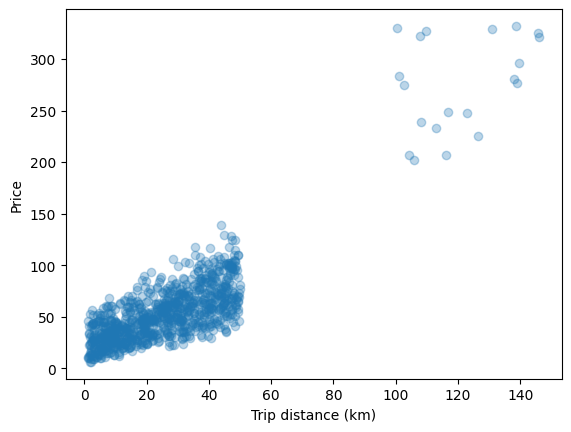

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["Trip_Distance_km"], df["Trip_Price"], alpha=0.3)
plt.xlabel("Trip distance (km)")
plt.ylabel("Price")
plt.show()

## Conclusion:
All the categorical df and some of the numeric df have small or none correlation to the price. There are also a number of outliers that needs to be handeled to not skew the prediction.

I could build a base model just using the strong numeric df, and then make a more advanced model using all features - and then compare the two.